In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
val_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,)),
])

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.RandomRotation(10),
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,)),
])

In [8]:
train_dataset = datasets.STL10(root='./data', split='train', download=True, transform=train_transform)
val_dataset = datasets.STL10(root='./data', split='test', download=True, transform=val_transform)

Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


In [15]:
num = 64
train_loader = DataLoader(train_dataset, batch_size=num, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=num, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


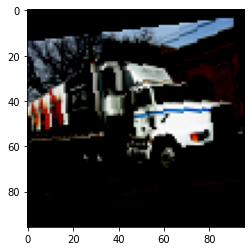

In [16]:
data_iter = iter(train_loader)

data_iter = iter(train_loader)
imgs, labels = data_iter.next()
plt.imshow(imgs[0].permute(1,2,0))

In [19]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [28]:
for param in model.parameters():
    param.requires_grad = False

In [31]:
#model.classifier[6] = nn.Linear(in_features=4096,out_features=10)
model.fc = nn.Linear(512,10)

In [32]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer =  optim.Adam(model.parameters(),lr = 0.001)

In [38]:
%%time
num_epochs = 15
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0





    model.train()

    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)
      
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        train_loss += loss.item()
        pred = torch.argmax(outputs, dim=1)
        train_acc += (pred == labels).sum().item()

        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)




    model.eval()
    with torch.no_grad():
      for images, labels in val_loader:
          
          images = images.to(device)
          labels = labels.to(device)

          outputs = model(images)
          loss = criterion(outputs, labels)
          
          val_loss += loss.item()
          pred = torch.argmax(outputs, dim=1)
          val_acc += (pred == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_acc / len(val_loader.dataset)


        
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)


Epoch [1/15], Loss: 0.0234, val_loss: 0.0155, val_acc: 0.6876
Epoch [2/15], Loss: 0.0154, val_loss: 0.0128, val_acc: 0.7369
Epoch [3/15], Loss: 0.0139, val_loss: 0.0119, val_acc: 0.7521
Epoch [4/15], Loss: 0.0128, val_loss: 0.0114, val_acc: 0.7632
Epoch [5/15], Loss: 0.0123, val_loss: 0.0115, val_acc: 0.7579
Epoch [6/15], Loss: 0.0120, val_loss: 0.0111, val_acc: 0.7656
Epoch [7/15], Loss: 0.0118, val_loss: 0.0109, val_acc: 0.7644
Epoch [8/15], Loss: 0.0114, val_loss: 0.0109, val_acc: 0.7655
Epoch [9/15], Loss: 0.0112, val_loss: 0.0109, val_acc: 0.7666
Epoch [10/15], Loss: 0.0109, val_loss: 0.0105, val_acc: 0.7755
Epoch [11/15], Loss: 0.0105, val_loss: 0.0109, val_acc: 0.7672
Epoch [12/15], Loss: 0.0108, val_loss: 0.0107, val_acc: 0.7686
Epoch [13/15], Loss: 0.0105, val_loss: 0.0109, val_acc: 0.7659
Epoch [14/15], Loss: 0.0103, val_loss: 0.0109, val_acc: 0.7690
Epoch [15/15], Loss: 0.0106, val_loss: 0.0108, val_acc: 0.7655
CPU times: user 2min 31s, sys: 19.7 s, total: 2min 51s
Wall time

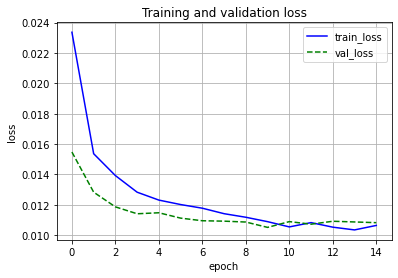

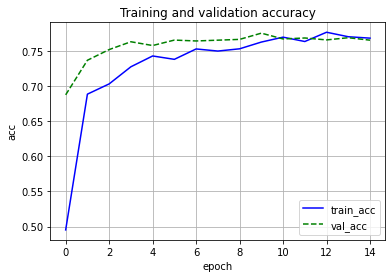

In [39]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()